In [40]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [41]:
max_features = 10000  # Consider only the top 10,000 words in the dataset
maxlen = 500  # Cut off reviews after 100 words
batch_size = 32


In [42]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
model = Sequential()
model.add(Embedding(max_features, 16, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()


C:\Users\rhutu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
history = model.fit(train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9999 - loss: 0.0033 - val_accuracy: 0.8632 - val_loss: 0.4949
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8608 - val_loss: 0.5217
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8634 - val_loss: 0.5383
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8610 - val_loss: 0.5589
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 7.1579e-04 - val_accuracy: 0.8574 - val_loss: 0.6001


In [49]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_squared_error
y_pred = model.predict(test_data)
y_pred = np.round(y_pred)
print(f'MSE: {mean_squared_error(test_labels, y_pred)}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.8539 - loss: 0.5991
Test Accuracy: 0.852400004863739
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE: 0.1476


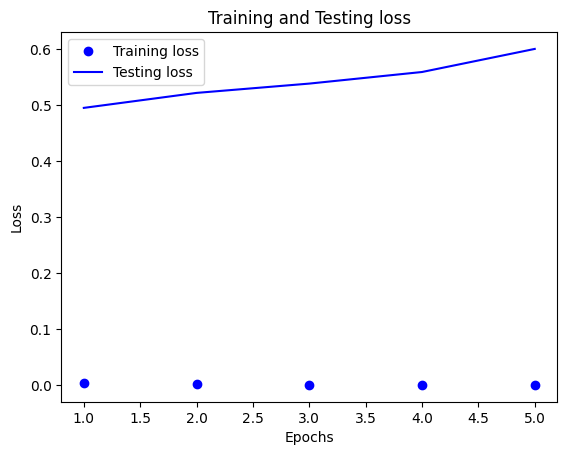

In [50]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
